# Résolution de l'équation d'élasticité linéaire

Le but de cette section est d'approcher la solution de l'équation aux dérivées partielles relative à l'étude de l'élasticité linéaire. Cela nous permettra de pouvoir décrire le comportement d'un corps subissant une force.

Pour cela, nous ne détaillerons pas l'intégralité des éléments vus lors des premières séances de ce cours. Nous allons commencer par développer certains éléments mathématiques dont nous avons besoin. Nous nous plaçons dans un espace de dimension 2 où $u = (u_1 , u_2)$ correspond au déplacement du point après la déformation. 

Nous avons défini le tenseur de Cauchy (appelé aussi tenseur de contraintes) $\tau_{i,j} = \{ \sigma_{i,j} \}$ tel que : 

$$ \sigma_{i,j} = \lambda  (e_{nn}) \delta_{i,j} + 2 \mu  e_{i,j}$$ 

où $\delta_{i,j} = \left\{ \begin{array}{ll} 1 &\mbox{ si } i = j \\ 0 &\mbox{sinon} \end{array} \right.$ et $\lambda$ et $\mu$ sont appelés les coefficients de Lamé. 

L'élément $e$ est appelé le tenseur de déformation et est défini de la manière suivante : 

$$ e_{i,j} = \dfrac{1}{2} \left( \dfrac{\partial u_i}{\partial x_j} + \dfrac{\partial u_j}{\partial x_i} \right) $$

Le tenseur de déformation est une matrice symétrique , diagonalisable avec des valeurs propres réelles.

De plus, la définition d'équilibre (somme des forces appliquées en un point est nulle) nous montre que, si l'on note $F = \{ F_i\}$ la force extérieure par unité de surface, on obtient l'équation suivante : 

$$ \dfrac{\partial \sigma_{i,j} }{\partial x_j} + F_i = 0$$

On peut donc essayer de résoudre cette équation en commençant par décrire les $\sigma_{i,j}$ :

- $\sigma_{1,1} = \lambda \left(\dfrac{\partial u_1}{\partial x_1}+\dfrac{\partial u_2}{\partial x_2}\right) + \mu \dfrac{\partial u_1}{\partial x_1}$
- $\sigma_{2,2} = \lambda \left(\dfrac{\partial u_1}{\partial x_1}+\dfrac{\partial u_2}{\partial x_2}\right) + \mu \dfrac{\partial u_2}{\partial x_2}$
- $\sigma_{1,2} = \sigma_{2,1} = \mu e_{1,2} = \dfrac{1}{2} \mu \left(\dfrac{\partial u_1}{\partial x_2}+\dfrac{\partial u_2}{\partial x_1} \right)$

On obtient alors deux équations dont la première se développe de la façon suivante : 

\begin{align*}
&\Longrightarrow \dfrac{ \partial \sigma_{1,j}}{\partial x_j} + F_1 &= 0 \\
&\Longleftrightarrow \dfrac{ \partial \sigma_{1,1}}{\partial x_1} + \dfrac{ \partial \sigma_{1,2}}{\partial x_2} + F_1 &= 0 \\
&\Longleftrightarrow  \lambda \left( \dfrac{\partial^2 u_1}{\partial^2 x_1}+\dfrac{\partial^2 u_2}{\partial x_1 \partial x_2}\right) + 2 \mu \dfrac{\partial^2 u_1}{\partial^2 x_1} + \mu \left(\dfrac{\partial^2 u_1}{\partial^2 x_2}+\dfrac{\partial^2 u_2}{\partial x_2 \partial x_1} \right)+ F_1 &= 0  \\
&\Longleftrightarrow \mu \left( \dfrac{\partial^2 u_1}{\partial^2 x_1} +  \dfrac{\partial^2 u_1}{\partial^2 x_2}\right) + \left( \lambda + \mu \right) \left( \dfrac{\partial^2 u_1}{\partial^2 x_2}+\dfrac{\partial^2 u_2}{\partial x_1 \partial x_2} \right) + F_1 &= 0 \\
&\Longleftrightarrow \mu \Delta u_1 + \left(\lambda + \mu\right)\left(\dfrac{\partial^2 u_1}{\partial^2 x_1}+\dfrac{\partial^2 u_2}{\partial x_1 \partial x_2} \right) + F_1 &= 0
\end{align*}

Si l'on pose $\delta = \dfrac{\lambda + \mu}{\mu}$ et $\tilde{F_i} = \dfrac{F_i}{\mu}$ on obtient : 

$$ \Delta u_1 + \delta \left( \dfrac{\partial^2 u_1}{\partial^2 x_1}+\dfrac{\partial^2 u_2}{\partial x_1 \partial x_2}  \right)  = - \tilde{F_1}$$

En procédant de même on obtient la seconde équation : 

$$ \Delta u_2 + \delta \left( \dfrac{\partial^2 u_2}{\partial^2 x_2}+\dfrac{\partial^2 u_1}{\partial x_1 \partial x_2}  \right)  = - \tilde{F_2}$$

De manière générale l'équation aux dérivées partielles que nous allons discrétiser est la suivante : 

$$ \mu \Delta u + \left( \lambda + \mu \right) \nabla \left( \nabla u \right) + F = 0$$ 

Finalement, en combinant les éléments précédents ainsi que les notations et les consignes données dans le cours, on cherche à résoudre le problème suivant : 

$$
\left\{
    \begin{array}{ll}
        \Delta u + \delta \nabla \left( \nabla u \right)  = - \tilde{F} &\mbox{sur }\quad \Omega = [0,1]\times[0,1]\\
        u = 0 &\mbox{sur } \quad \partial \Omega
    \end{array}
\right.
$$

où $u = (u_1,u_2)$ et $F = (F_1,F_2)$ est défini dans le cours.

La stratégie adoptée sera donc la suivante. Nous commencerons par coder toutes les fonctions discrétisant les opérateurs différentiels dont nous avons besoin. Par suite nous nous ramènerons à un système linéaire de la forme AU = F. Le système linéaire aura donc la forme suivante : 

<img src="Pic4.jpeg" width="800" height="600" align="center"/>

Nous résolverons le système puis afficherons les 2 vecteurs de déformation $u_1$ et $u_2$. Finalement, nous connaissons les deux fonctions solution de l'équation (par rapport aux fonctions F données), ce qui va nous permettre, en dernier lieu, d'afficher les graphiques d'erreur et conclure sur la pertinence de notre approximation.

On commence par importer les packages dont nous avons besoin : 

In [1]:
import numpy as np                        #Package pour calculs scientifiques
import scipy.sparse as sparse             #Algèbre linéaire creuse
import matplotlib.pyplot as plt           #Permet la création de graphique  
import scipy.sparse.linalg as sci         #Contient plusieurs packages pour le calcul scientifique
from mpl_toolkits.mplot3d import Axes3D   #Utile pou le graphiques 3D
import time                               #Affichage du temps de calcul
from IPython.display import Image         #Affichage d'image dans le Jupyter
from scipy.sparse import bmat             #Construction d'une matrice par blocs

On va maintenant écrire les codes pour les différentes discrétisations des opérateurs différentiels. La description des matrices sera lisible en commentaire dans le code.

In [2]:
def Laplacien(N):
    """Retourne une matrice sparse de taille (N+1)*(N+1) correspondant 
    à la discrétisation du Laplacien sur l'intégralité du maillage"""
    
    h = 1./N
    h2 = h*h
    taille = (N+1)*(N+1)

    diags = np.zeros((5,taille))

    #Diagonale principale
    diags[2,:] = 1.
    diags[2, N+2:taille - (N+2)] = -4./h2
    diags[2, np.arange(2*N+1, taille, N+1)] = 1.
    diags[2, np.arange(2*N+2, taille, N+1)] = 1.
              
    #Diagonale "-1"
    diags[1,N+1:taille-(N+1)] = 1./h2
    diags[1, np.arange(2*N, taille, N+1)] = 0.
    diags[1, np.arange(2*N+1, taille, N+1)] = 0.
    
    #Diagonale "+1"
    diags[3, N+3:taille-(N+1)] = 1./h2
    diags[3, np.arange(2*N+2, taille, N+1)] = 0.
    diags[3, np.arange(2*N+3, taille, N+1)] = 0.

    #Diagonale "-(N+1)"
    diags[0, 1 : taille - (2*N+3)] = 1./h2
    diags[0, np.arange(N,taille,N+1)] = 0.
    diags[0, np.arange(N+1,taille,N+1)] = 0.

    #Diagonale "+(N+1)"
    diags[4, taille - N*N + 2 : taille - 1] = 1./h2
    diags[4, np.arange(taille - N*N + 1 + N ,taille,N+1)] = 0.
    diags[4, np.arange(taille - N*N + 2 + N ,taille,N+1)] = 0.

    #Construction de la matrice creuse
    A = sparse.spdiags(diags,[-(N+1),-1,0,1,(N+1)],taille,taille, format = "csr")
    
    return A

La visualisation de la matrice a déjà été faite précédemment, nous nous contenterons seulement de regarder la visualisation des autres matrices.

In [3]:
def matrix_croi(N):
    """Retourne une matrice sparse de taille (N+1)*(N+1) correspondant 
    à la discrétisation des dérivées croisées sur l'intégralité du maillage"""

    h = 1./N
    h2 = h*h
    taille = (N+1)*(N+1)

    diags = np.zeros((4,taille))

    #Diagonale "-N-2"
    diags[0, 0 : taille - 2*(N+1)] = 1./(4*h2)
    diags[0, np.arange(N-1,taille,N+1)] = 0
    diags[0, np.arange(N,taille,N+1)] = 0

    #Diagonale "-N"
    diags[1, 2 : taille - (2*N+2)] = -1./(4*h2)
    diags[1, np.arange(N+1,taille,N+1)] = 0
    diags[1, np.arange(N+2,taille,N+1)] = 0

    #Diagonale "N"
    diags[2, 2*(N+1) : taille - 2] = -1./(4*h2)
    diags[2, np.arange(2*(N+1)+(N-1),taille,N+1)] = 0
    diags[2, np.arange(2*(N+1)+N,taille,N+1)] = 0

    #Diagonale "N+2"
    diags[3, 2*(N+2) : taille] = 1./(4*h2)
    diags[3, np.arange(2*(N+2)+N-1,taille,N+1)] = 0
    diags[3, np.arange(2*(N+2)+N,taille,N+1)] = 0

    #Construction de la matrice creuse
    A = sparse.spdiags(diags,[-(N+2),-N,N,(N+2)],taille,taille, format = "csr")

    return A

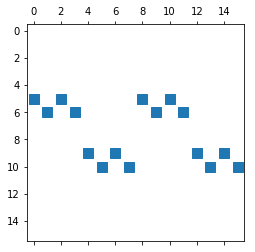

In [4]:
plt.spy(matrix_croi(3))

In [5]:
def der_sec1(N):
    """Retourne une matrice sparse de taille (N+1)*(N+1) 
    correspondant à la discrétisation de la dérivée seconde 
    par rapport à la premiere variable  sur l'intégralité du maillage"""
    
    h = 1./N
    h2 = h*h
    taille = (N+1)*(N+1)

    diags = np.zeros((3,taille))

    #Diagonale principale
    diags[1,:] = 0
    diags[1, N+2:taille - (N+2)] = -2./h2
    diags[1, np.arange(2*N+1, taille, N+1)] = 0
    diags[1, np.arange(2*N+2, taille, N+1)] = 0
              
    #Diagonale "-1"
    diags[0,N+1:taille-(N+1)] = 1./h2
    diags[0, np.arange(2*N, taille, N+1)] = 0.
    diags[0, np.arange(2*N+1, taille, N+1)] = 0.
    
    #Diagonale "+1"
    diags[2, N+3:taille-(N+1)] = 1./h2
    diags[2, np.arange(2*N+2, taille, N+1)] = 0.
    diags[2, np.arange(2*N+3, taille, N+1)] = 0.

    #Construction de la matrice creuse
    A = sparse.spdiags(diags,[-1,0,1],taille,taille, format = "csr")

    return A

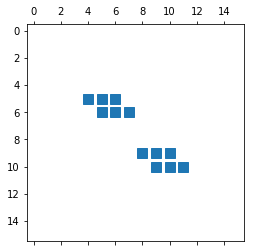

In [6]:
plt.spy(der_sec1(3))

In [7]:
def der_sec2(N):
    """Retourne une matrice sparse de taille (N+1)*(N+1) 
    correspondant à la discrétisation de la dérivée seconde 
    par rapport à la seconde variable  sur l'intégralité du maillage"""
    
    h = 1./N
    h2 = h*h
    taille = (N+1)*(N+1)

    diags = np.zeros((3,taille))

    #Diagonale principale
    diags[1,:] = 0.
    diags[1, N+2:taille - (N+2)] = -2./h2
    diags[1, np.arange(2*N+1, taille, N+1)] = 0.
    diags[1, np.arange(2*N+2, taille, N+1)] = 0.

    #Diagonale "-(N+1)"
    diags[0, 1 : taille - (2*N+3)] = 1./h2
    diags[0, np.arange(N,taille,N+1)] = 0.
    diags[0, np.arange(N+1,taille,N+1)] = 0.

    #Diagonale "+(N+1)"
    diags[2, taille - N*N + 2 : taille - 1] = 1./h2
    diags[2, np.arange(taille - N*N + 1 + N ,taille,N+1)] = 0.
    diags[2, np.arange(taille - N*N + 2 + N ,taille,N+1)] = 0.

    #Construction de la matrice creuse
    A = sparse.spdiags(diags,[-(N+1),0,(N+1)],taille,taille, format = "csr")

    return A

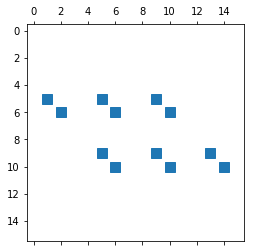

In [8]:
plt.spy(der_sec2(3))

On peut remarquer que si l'on somme les matrices $\textit{der\_sec1}$ et $\textit{der\_sec2}$ on retrouve la matrice de discrétsation du Laplacien (ce qui est, par définition, logique).

Ensuite, on assemble la matrice de discrétisation grâce à la fonction suivante : 

In [9]:
def matrix_elas(N,mu,lamb):
    """Retourne la matrice sparse globale pour la discrétisation du problème d'élasticité linéaire. 
    Cette matrice sera de taille (2*(N+1))^2. Cette fonction prend en paramètre N 
    le nbr d'intervalle de discrétisation, mu et lamb des scalaires pour l'élasticité linéaire."""

    delta = (lamb + mu)/mu

    LAP = Laplacien(N)
    CR = matrix_croi(N)
    DER1 = der_sec1(N)
    DER2 = der_sec2(N)

    #Utilisation de la fonction bmat qui permet la construction d'une matrice "par blocs".
    
    MATRIX = bmat([ [LAP + delta*DER1 , CR],[-CR , LAP + delta*DER2]], format = 'csr')

    return MATRIX

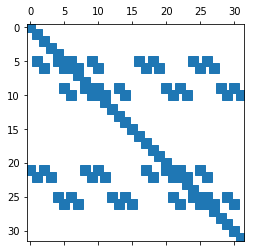

In [10]:
plt.spy(matrix_elas(3,1,0))

On écrit les fonctions de second membre et solutions exactes données en cours.

In [11]:
def snd_mbr(x,y,delta):
    """Les second membres F1 et F2 sont exprimés directement avec le signe - devant
    , ce sont les fonctions tildes, i.e pour trouver F1 et F2; 
    F_itilde = F_i/mu. On prendra un delta egal à 1"""

    F1 = 6*(1-3*x+2*x**2)*(-1+y)*y**3 + 6*(-1+x)**3*x*y*(-1+2*y) + delta*(-1+y)*(-1+5*y-4*y**2+6*y**3+12*x**2*y**3-2*x*(-1+5*y-4*y**2+9*y**3))
    F2 = 2*(-1+y)**3*y + 6*(-1+x)*x*(1-3*y+2*y**2) + delta*(-1+x)*(y**2*(-3+4*y)+4*x**2*y**2*(-3+4*y)+x*(6-18*y+27*y**2-20*y**3))
    
    return [F1, F2]

In [12]:
def func_exacte(x1,x2):
    u1 = x1*x2**3*(x1-1)**3*(x2-1)
    u2 = x1*x2*(x1-1)*(x2-1)**3

    return [u1,u2]

Finalement on écrit le code pour résoudre le système linéaire.

In [13]:
def resolution(N,mu,lamb,force):
    
    #Pour une valeur de delta égale = 1 il suffit de prendre lambda = 0
    
    x = np.linspace(0,1,N+1)
    y = np.linspace(0,1,N+1)

    taille = (N+1)*(N+1)

    delta = (lamb + mu)/mu
    
    F = np.zeros(2*taille)

    for i in range(1,N):
        for j in range(1,N):
            k = i + j*(N+1)
            F[k] = force(x[i],y[j],delta)[0]/mu
            F[k+taille] = force(x[i],y[j],delta)[1]/mu

    MAT = matrix_elas(N,mu,lamb)

    U = sci.spsolve(MAT,F)
    
    return U

On fait le calcul de la solution exacte afin de pouvoir faire des comparaisons : 

In [14]:
def solution_exacte(N,mu,lamb,f_ex):
    
    x = np.linspace(0,1,N+1)
    y = np.linspace(0,1,N+1)

    taille = (N+1)*(N+1)

    delta = (lamb + mu)/mu
    E = np.zeros(2*taille)
    
    for i in range (N+1):
        for j in range (N+1):
            k = i + j*(N+1)
            E[k] = f_ex(x[i],y[j])[0]
            E[k + taille] = f_ex(x[i],y[j])[1]
            
    return E    

Et on affiche enfin les graphiques : 

In [15]:
def graphe_reso(N,mu,lamb,force,f_ex):
    
    x = np.linspace(0,1,N+1)
    y = np.linspace(0,1,N+1)
    
    taille = (N+1)*(N+1)
    
    U = resolution(N,mu,lamb,force)
    E = solution_exacte(N,mu,lamb,f_ex)

    u1 = E[0:taille]
    u2 = E[taille : 2*taille]
    
    U1 = U[0:taille]
    U2 = U[taille : 2*taille]
    
    fig = plt.figure(figsize = [16,12])
    
    ax = fig.add_subplot(2,2,1,projection='3d')
    X,Y = np.meshgrid(x,y)
    ax.plot_surface(X,Y, U1.reshape((N+1,N+1)), cmap='plasma')
    plt.title("Solution de u1 discrétisée")
    plt.xlabel("x")
    plt.ylabel("y")

    ax = fig.add_subplot(2,2,2,projection='3d')
    X,Y = np.meshgrid(x,y)
    ax.plot_surface(X,Y, u1.reshape((N+1,N+1)), cmap='plasma')
    plt.title("Solution de u1 exacte")
    plt.xlabel("x")
    plt.ylabel("y")

    
    ax = fig.add_subplot(2,2,3,projection='3d')
    X,Y = np.meshgrid(x,y)
    ax.plot_surface(X,Y, U2.reshape((N+1,N+1)), cmap='plasma')
    plt.title("Solution de u2 discrétisée")
    plt.xlabel("x")
    plt.ylabel("y")
    
    ax = fig.add_subplot(2,2,4,projection='3d')
    X,Y = np.meshgrid(x,y)
    ax.plot_surface(X,Y, u2.reshape((N+1,N+1)), cmap='plasma')
    plt.title("Solution de u2 exacte")
    plt.xlabel("x")
    plt.ylabel("y")

    plt.show()

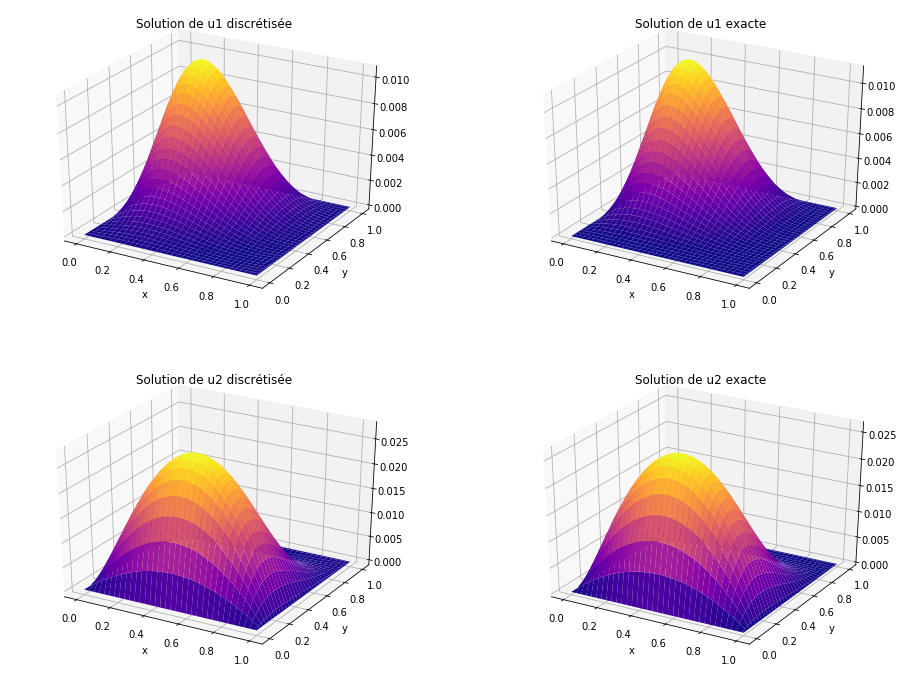

In [16]:
graphe_reso(100,1,0,snd_mbr,func_exacte)

Et enfin on affiche les graphes d'erreurs. Nous regardons, comme d'habitude, les erreurs absolues et euclidiennes. Le schéma utilisé étant un schéma d'ordre 2, nous attendons une pente de régression linéaire de -2.

In [20]:
def erreur_abs(A,E,N):
    return np.max(np.abs(E - A))

def erreur_eucl(A,E,N):
    return np.sqrt(np.sum((E-A)**2))/((N+1)**2)

def aff(x,b,a):
    return np.exp(b)*x**(a)

In [21]:
def graphe_erreur(N,mu,lamb,force,f_ex):
    tab_err1 = np.zeros(N)
    tab_err2 = np.zeros(N)
    ERR1 = np.zeros(N)
    ERR2 = np.zeros(N)
    x = np.linspace(1,N,N)

    
    for i in range(1,N+1):  
        taille = (N+1)*(N+1)
        U = resolution(N,mu,lamb,force)
        E = solution_exacte(N,mu,lamb,f_ex)
        
        E1 = E[0:taille]
        E2 = E[taille : 2*taille]
    
        U1 = U[0:taille]
        U2 = U[taille : 2*taille]
        
        tab_err1[i-1] = erreur_eucl(E1,U1,i)
        tab_err2[i-1] = erreur_eucl(E2,U2,i)

    x1 = x[N-10:N]
    Err1 = tab_err1[N-10:N]
    Err2 = tab_err2[N-10:N]
    z1 = np.polyfit(np.log(x1),np.log(Err1),1)
    z2 = np.polyfit(np.log(x1),np.log(Err2),1)
        
    y1 = aff(x,z1[1],z1[0])  
    y2 = aff(x,z2[1],z2[0])   
        
    plt.figure(figsize = [15,8])
    plt.subplot(1,2,1)
    plt.plot(x,tab_err1,color='blue',marker='o', linestyle='none')
    plt.plot(x,y1,color='r', linestyle='-')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('N')
    plt.ylabel('Erreur log Abs')
    plt.title('Erreur de U1')
        
    plt.subplot(1,2,2)
    plt.plot(x,tab_err2,color='blue',marker='o', linestyle='none')
    plt.plot(x,y2,color='r', linestyle='-')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('N')
    plt.ylabel('Erreur log Abs')
    plt.title('Erreur de U2')    
    
    plt.show()
    
    return z1[0],z2[0]

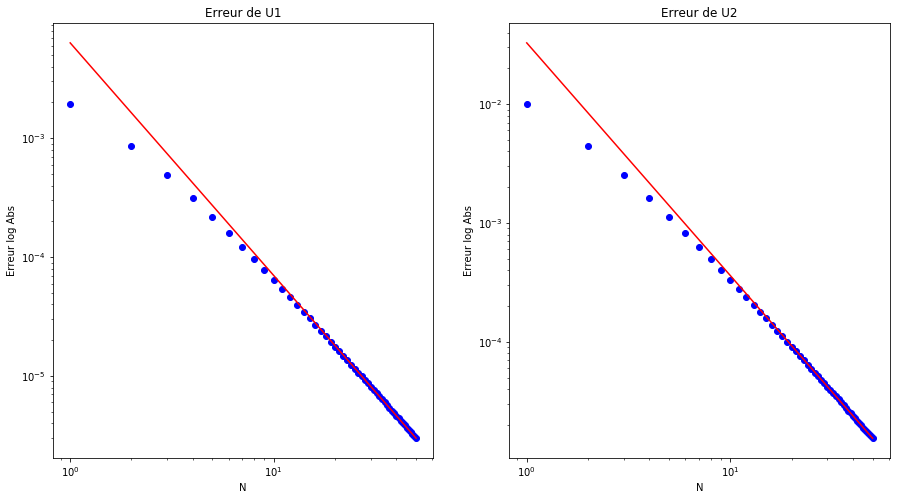

(-1.9567584564535896, -1.956758456453595)

In [22]:
graphe_erreur(50,1,0,snd_mbr,func_exacte)